<a href="https://colab.research.google.com/github/vddavydova/colab/blob/main/sem08_parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAP: class 8_parsing

___

# Agenda 

* азы всех азов
* что делать, если сервер разозлился
* еще про API
* что такое Selenium 
* хитрости

__________

# 1. Азы всех азов

Чтобы усвоить азы всех азов, прочитайте [статейку с хабра.](https://habr.com/ru/company/ods/blog/346632/) Там в соавторах один из семинаристов Вышки по аналогичному курсу в Москве, что как бы намекает на то, что контент годный.

## Что такое HTML? 

**HTML (HyperText Markup Language)**  — это такой же язык разметки как Markdown или LaTeX. Он является стандартным для написания различных сайтов. Команды в таком языке называются **тегами**. Если открыть абсолютно любой сайт, нажать на правую кнопку мышки, а после нажать `View page source`, то перед вами предстанет HTML скелет этого сайта. 

Вот так можно открыть html-код стартовой яндекса, найти в нём новость из топа и немного её изменить. Понятное дело, что вы так меняете html-страничку только на своём компьютере (клиенте). На сервере яндекса остаётся исходная версия. Когда вы обновите страничку все правки исчезнут. Однако никто вам не запрещает ворваться вк в какую-нибудь переписку, открыть её код, поменять текст нескольких сообщений и наделать скринов для мемов. 


HTML-страница это ни что иное, как набор вложенных тегов. Можно заметить, например, следующие теги:

- `<title>` – заголовок страницы
- `<h1>…<h6>` – заголовки разных уровней
- `<p>` – абзац (paragraph)
- `<div>` – выделения фрагмента документа с целью изменения вида содержимого
- `<table>` – прорисовка таблицы 
- `<tr>` – разделитель для строк в таблице 
- `<td>` – разделитель для столбцов в таблице
- `<b>` – устанавливает жирное начертание шрифта

Обычно команда `<...>` открывает тег, а  `</...>` закрывает его. Все, что находится между этими двумя командами, подчиняется правилу, которое диктует тег. Например, все, что находится между `<p>` и  `</p>` — это отдельный абзац.   

Теги образуют своеобразное дерево с корнем в теге `<html>` и разбивают страницу на разные логические кусочки. У каждого тега есть свои потомки (дети) — те теги, которые вложены в него и свои родители. 

Например, HTML-древо страницы может выглядеть вот так:


````
<html>
<head> Заголовок </head>
<body>
    <div>
        Первый кусок текста со своими свойствами
    </div>
    <div>
        Второй кусок текста
            <b>
                Третий, жирный кусок
            </b>
    </div>
    Четвёртый кусок текста
</body>
</html>
````

Можно работать с этим html как с текстом, а можно как с деревом. Обход этого дерева и есть парсинг веб-страницы. Мы всего лишь будем находить нужные нам узлы среди всего этого разнообразия и забирать из них информацию!

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/tree.png" width="450"> 

## Качаем цены на книги

* Хотим собрать [цены на книги](http://books.toscrape.com)
* Руками долго, напишем код

Доступ к веб-станицам позволяет получать модуль requests. Подгрузим его. Если у вас не установлен этот модуль, то придётся напрячься и установить:  `pip install requests`.

In [ ]:
import requests  

url = 'http://books.toscrape.com/catalogue/page-1.html'
response = requests.get(url)
response

<Response [200]>

Благословенный 200 ответ - соединение установлено и данные получены, всё чудесно! Если попытаться перейти на несуществующую страницу, то можно получить, например, знаменитую ошибку 404.

In [ ]:
requests.get('http://books.toscrape.com/big_scholarship')

<Response [404]>

Внутри response лежит html-разметка странички, которую мы парсим. 

In [ ]:
response.content[:1000]

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon"

Выглядит неудобоваримо, как насчет сварить из этого дела что-то покрасивее? Например, прекрасный суп.

<center>
<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/alisa.jpg" height="200" width="200"> 
<center>


Пакет **[`bs4`](https://www.crummy.com/software/BeautifulSoup/)**, a.k.a **BeautifulSoup** был назван в честь стишка про красивый суп из Алисы в стране чудес. Эта совершенно волшебная библиотека, которая из сырого и необработанного HTML (или XML) кода страницы выдаст вам структурированный массив данных, по которому очень удобно искать необходимые теги, классы, атрибуты, тексты и прочие элементы веб страниц.

> Пакет под названием `BeautifulSoup` — скорее всего, не то, что вам нужно. Это третья версия (*Beautiful Soup 3*), а мы будем использовать четвертую. Так что нам нужен пакет `beautifulsoup4`. Чтобы было совсем весело, при импорте нужно указывать другое название пакета — `bs4`, а импортировать функцию под названием `BeautifulSoup`. В общем, сначала легко запутаться, но эти трудности нужно преодолеть однажды, а потом будет проще.

In [ ]:
from bs4 import BeautifulSoup

# распарсили страничку в дерево 
tree = BeautifulSoup(response.content, 'html.parser')

Внутри переменной `tree` теперь лежит дерево из тегов, по которому мы можем совершенно спокойно бродить. 

In [ ]:
tree.html.head.title

<title>
    All products | Books to Scrape - Sandbox
</title>

Можно вытащить из того места, куда мы забрели, текст с помощью метода `text`.

In [ ]:
tree.html.head.title.text

'\n    All products | Books to Scrape - Sandbox\n'

С текстом можно работать классическими питоновскими методами. Например, можно избавиться от лишних отступов.

In [ ]:
tree.html.head.title.text.strip()

'All products | Books to Scrape - Sandbox'

Более того, зная адрес элемента, мы сразу можем найти его. Например, вот так в коде страницы мы можем найти где именно для каждой книги лежит основная информация. Видно, что она находится внутри тега `article`, для которого прописан класс `product_pod` (грубо говоря, в html класс задаёт оформление соотвествующего кусочка страницы). 

Вытащим инфу о книге из этого тега. 

In [ ]:
books = tree.find_all('article', {'class' : 'product_pod'})
books[0]

<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

Полученный после поиска объект также обладает структурой bs4. Поэтому можно продолжить искать нужные нам объекты уже в нём.

In [ ]:
type(books[0])

bs4.element.Tag

In [ ]:
books[0].find('p', {'class': 'price_color'}).text

'£51.77'

Обратите внимание, что для поиска есть как минимум два метода: `find` и `find_all`. Если несколько элементов на странице обладают указанным адресом, то метод `find` вернёт только самый первый. Чтобы найти все элементы с таким адресом, нужно использовать метод `find_all`. На выход будет выдан список.

Кроме содержимого у тегов часто есть атрибуты. Например, у названия книги есть атрибуты `title` и `href`: 

In [ ]:
books[0].h3

<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>

Их тоже можно вытащить.

In [ ]:
books[0].h3.a.get('href')

'a-light-in-the-attic_1000/index.html'

In [ ]:
books[0].h3.a.get('title')

'A Light in the Attic'

А ещё по этим атрибутам можно искать интересующие нас кусочки страницы. 

In [ ]:
tree.find_all('a', {'title': 'A Light in the Attic'})

[<a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>]

Собственно говоря, это всё. 

Обратите внимание, что на сайте все книги лежат на разных страничках. Если попробовать потыкать их, можно заметить, что в ссылке будет меняться атрибут `page`. Значит, если мы хотим собрать все книги, надо создать кучу ссылок с разным `page` внутри цикла. Когда качаешь данные с более сложных сайтов, в ссылке часто есть огромное количество атрибутов, которые регулируют выдачу.

Давайте запишем весь код для сбора книг в виде функции. На вход она будет принимать номер странички, которую надо скачать. 

In [ ]:
def get_page(p):
    
    # изготовили ссылку
    url = 'http://books.toscrape.com/catalogue/page-{}.html'.format(p)
    
    # сходили по ней
    response = requests.get(url)
    
    # построили дерево 
    tree = BeautifulSoup(response.content, 'html.parser')
    
    # нашли в нём всё самое интересное
    books = tree.find_all('article', {'class' : 'product_pod'})
    
    infa = [ ]
    
    for book in books:
        infa.append({'price': book.find('p', {'class': 'price_color'}).text,
                     'href': book.h3.a.get('href'),
                     'title': book.h3.a.get('title')})
                     
    return infa

Осталось только пройтись по всем страничкам от page-1 до page-50 циклом и данные у нас в кармане. 

In [ ]:
infa = []

for p in range(1,51):
    infa.extend(get_page(p))

In [ ]:
import pandas as pd

df = pd.DataFrame(infa)
print(df.shape)
df.head()

(1000, 3)


,price,href,title
0,£51.77,a-light-in-the-attic_1000/index.html,A Light in the Attic
1,£53.74,tipping-the-velvet_999/index.html,Tipping the Velvet
2,£50.10,soumission_998/index.html,Soumission
3,£47.82,sharp-objects_997/index.html,Sharp Objects
4,£54.23,sapiens-a-brief-history-of-humankind_996/index...,Sapiens: A Brief History of Humankind


Кстати говоря, если перейти по ссылке в саму книгу, там о ней будет куча дополнительной информации. Можно пройтись по всем ссылкам и выкачать себе по ним дополнительную информацию. 

# 2. Что делать, если сервер разозлился

Вы решили собрать себе немного данных...
* Error 403, 404, 504, $\ldots$ 
* Требования зарегистрироваться
* Заботливые сообщения, что с вашего устройства обнаружен подозрительный трафик

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/doge.jpg" width="450"> 

## а) быть терпеливым 

* Слишком частые запросы раздражают сервер
* Ставьте между ними временные задержки 

In [ ]:
import time
time.sleep(3) # и пусть весь мир подождёт 3 секунды

## б) быть похожим на человека


Запрос нормального человека через браузер выглядит так: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/browser_get.png" width="600"> 
 


С ним на сервер попадает куча информации! Запрос от питона выглядит так: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/python_get.jpg" width="250"> 




Заметили разницу?  Очевидно, что нашему скромному запросу не тягаться с таким обилием мета-информации, которое передается при запросе из обычного браузера. К счастью, никто нам не мешает притвориться человечными и пустить пыль в глаза сервера при помощи генерации фейкового юзер-агента. Библиотек, которые справляются с такой задачей, существует очень и очень много, лично мне больше всего нравится [fake-useragent.](https://pypi.org/project/fake-useragent/) При вызове метода из различных кусочков будет генерироваться рандомное сочетание операционной системы, спецификаций и версии браузера, которые можно передавать в запрос:

In [ ]:
# не забываем устанавливать библиотеки

#!pip install fake_useragent

  Using cached fake_useragent-0.1.11-py3-none-any.whl


In [ ]:
from fake_useragent import UserAgent
UserAgent().chrome

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "C:\Users\Public\anaconda3\lib\site-packages\fake_useragent\utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "C:\Users\Public\anaconda3\lib\site-packages\fake_useragent\utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'

Например, https://knowyourmeme.com/ не захочет пускать к себе python и выдаст ошибку 403. Она выдается сервером, если он доступен и способен обрабатывать запросы, но по некоторым личным причинам отказывается это делать.

In [ ]:
url = 'https://knowyourmeme.com/'

response = requests.get(url)
response

<Response [403]>

А если сгенерировать User-Agent, вопросов у сервера не возникнет. 

In [ ]:
response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
response

<Response [200]>

__Другой пример:__ если захотите спарсить ЦИАН, он начнет вам выдавать капчу. Один из вариантов обхода: менять ip через тор. Однако на практически каждый запрос из-под тора, ЦИАН будет выдавать капчу. Если добавить в запрос `User_Agent`, то капча будет вылезать намного реже. 

## в) общаться через посредников

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/proxy.jpeg" width="400"> 

Посмотрим на свой ip-адрес без прокси. 

In [ ]:
r = requests.get('https://httpbin.org/ip')
print(r.json())

{'origin': '89.109.46.184'}


А теперь попробуем посмотреть, что будет если подключить прокси.

In [ ]:
proxies = {
    'http': '89.109.46.184'}

r = requests.get('https://httpbin.org/ip', proxies=proxies)

print(r.json())

{'origin': '89.109.46.184'}


Запрос работал немного подольше, ip адрес сменился. Большая часть проксей, которые вы найдёте работают криво. Иногда запрос идёт очень долго и выгоднее сбросить его и попробовать другую проксю. Это можно настроить опцией `timeout`.  Например, так если сервер не будет отвечать секунду, код упадёт. 

In [ ]:
import requests
requests.get('http://www.google.com', timeout=1)

<Response [200]>

У requests есть довольно много разных интересных примочек. Посмотреть на них можно в [гайде из документации.](https://requests.readthedocs.io/en/master/user/advanced/)


__Где можно попытаться раздобыть списки прокси:__ 

* https://qna.habr.com/q/591069
* https://getfreeproxylists.blogspot.com/
* Большая часть бесплатных прокси обычно не работает. Пишите парсер, который будет собирать списки из проксей и пытаться применить их. 

## г) уходить глубже 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/tor.jpg" width="600"> 



Можно попытаться обходить злые сервера через тор. Есть аж несколько способов, но мы про это говорить не будем. Лучше подробно почитать в нашей статье на Хабр, [т.е. тут](https://habr.com/ru/company/ods/blog/346632/).

## Совместить всё? 

1. Начните с малого.
2. Если продолжает банить, накидывайте новые примочки.
3. Каждая новая примочка бьёт по скорости.
4. [Разные примочки для requests](http://docs.python-requests.org/en/v0.10.6/user/advanced/).

# 3. API 

__API (Application Programming Interface)__ — это уже готовый код, который можно всунуть в свой код! Многие сервисы, в том числе Google и Вконтакте, предоставляют свои уже готовые решения для вашей разработки.

Примеры: 

* [Контактовский API](https://vk.com/dev/methods)
* [API twitter](https://developer.twitter.com/en/docs.html) 
* [API youtube](https://developers.google.com/youtube/v3/)
* [API google maps](https://developers.google.com/maps/documentation/) 
* [Aviasales](https://www.aviasales.ru/API)
* [Yandex Translate](https://yandex.ru/dev/translate/)

Оно есть почти везде! На этом семинаре мы посмотрим на на API контакта.

## 3.1 API vk

Зачем может понадобиться доступ к API контакта, думаю, объяснять не надо. Социальная сетка — это тонны различной полезной информации, которую можно заиспользовать для своего рисёрча. [В документации](https://vk.com/dev/manuals) очень подробно описано как можно работать с API контакта и к чему это приводит. 

Но для начала к API нужно получить доступ. Для этого придётся пройти пару бюрократических процедур (о, боже, эти два предложения были так бюрократически сформулированы, что мне захотелось отстоять в очереди).

Первая такая процедура заключается в создании своего приложения. Для этого переходим по [ссылке](http://vk.com/editapp?act=create) и проходимся по необходимым шагам:

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_1.png" width="500">

После подтверждения своей личности по номеру телефона, попадаем на страницу свежесозданного приложения

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_2.png" width="500">

Слева нам будем доступна вкладка с настройками, перейдя в неё мы увидим все необходимые нам для работы с приложением параметры:
<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_3.png" width="500">

Отсюда в качестве токена можно забрать сервисный ключ доступа. Для работы с частью методов API этого вполне достаточно (обычно в заголовке такого метода стоит соответствующая пометка). Иногда нужны дополнительные доступы. Для того, чтобы получить их, необходимо сделать ещё пару странных манипуляций:

Переходим по ссылке вида (на месте звездочек должен стоять ID созданного вами приложения):

> https://oauth.vk.com/authorize?client_id=**********&scope=8198&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.16&response_type=token

В итоге по этому запросу будет сформирована ссылка следующего вида:
> https://oauth.vk.com/blank.html#access_token=25b636116ef40e0718fe4d9f382544fc28&expires_in=86400&user_id=*******

Первый набор знаков — `access token`, т.е. маркер доступа. Вторая цифра (`expires_in=`) время работы маркера доступа в секундах (одни сутки). По истечению суток нужно будет получить новый маркер доступа. Последняя цифра (`user_id=`) ваш ID Вконтакте. Нам в дальнейшем понадобится маркер доступа. Для удобства сохраним его в отдельном файле или экспортируем в глобальную область видимости. В целях безопасности ваших данных не стоит нигде светить токенами и тем более выкладывать их в открытый доступ. __Так можно и аккаунта случайно лишиться.__ Берегите токен смолоду. 

Обратите внимание на ссылку, по которой мы делали запрос на предоставление токена. Внутри неё находится странный параметр `scope=8198.` Это мы просим доступ к конкретным разделам. Подробнее познакомиться с взаимно-однозначным соответствием между числами и правами можно [в документации.](https://vk.com/dev/permissions) Например, если мы хотим получить доступ к друзьям, фото и стенам, мы подставим в scope цифру 2+4++8192=8198.

In [ ]:
# посмотреть директорию по умолчанию, чтобы добавить в нее файл с токеном

import os
os.getcwd()

'C:\\Users\\Виолетта'

In [ ]:
# мой номер странички
myid = 'davydovaviolet'  # вставить id странички

# версия используемого API
version = '5.103' 

# подгружаем токен из файлика на компьютере
with open('secret_token.txt') as f:
    token = f.read()

Чтобы скачать что-то из контакта, надо сделать ссылку и сходить по ней пакетом `requests`. Ссылка должна будет включать в себя метод (что мы просим у вк) и параметры (насколько много и как именно). Мы будем просто заменять эти две штуки и выкачивать разные вещи. 

In [ ]:
method = 'users.get'
parameters = 'user_ids=davydovaviolet'

url = 'https://api.vk.com/method/' + method + '?' + parameters + '&v=' + version + '&access_token=' + token

response = requests.get(url) 
response.json()

{'response': [{'id': 218706293,
   'first_name': 'Violetta',
   'last_name': 'Davydova',
   'can_access_closed': False,
   'is_closed': True}]}

В ответ на наш запрос vk выкидывает JSON с информацией. JSON очень похож на птонячие словарики. Смысл квадратных и фигурных скобок такой же. Правда, есть и отличия: например, в Python одинарные и двойные кавычки ничем не отличаются, а в JSON можно использовать только двойные. 

Мы видим, что полученный нами JSON представляет собой словарь, значения которого — строки или числа, а также списки или словари, значения которых в свою очередь также могут быть строками, числами, списками, словарями и т.д. То есть получается такая довольно сложная структура данных, из которой можно вытащить всё то, что нас интересует. 

In [ ]:
response.json()['response'][0]['first_name']

'Violetta'

[В документации](https://vk.com/dev/manuals) очень подробно описано какие есть методы и какие у них бывают параметры.  Давайте завернём код выше в функцию и попробуем что-нибудь скачать.

In [ ]:
def vk_download(method, parameters):
    
    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url) 
    infa = response.json()
    return infa

Например, все лайки с [хайер скул оф мемс.](https://vk.com/hsemem)

In [ ]:
group_id = '-139105204'  # взяли из ссылки на группу

In [ ]:
wall = vk_download('wall.get', 'owner_id={}&count=100'.format(group_id))
wall = wall['response']

In [ ]:
wall['items'][0]

{'id': 81014,
 'from_id': -139105204,
 'owner_id': -139105204,
 'date': 1631882646,
 'marked_as_ads': 0,
 'post_type': 'post',
 'text': 'Нашему редактору Марии Платоновой суд назначил домашний арест на время следствия.\n\nМаше предстоит еще много препятствий и судебных заседаний на пути к свободе, которую у неё незаслуженно забрали. В частности, в ближайшие недели предстоит апелляция в Мосгорсуде.\n\nОгромное количество поручительств за Машу от друзей, родственников и коллег сегодня, возможно, сыграли не малую роль в решении суда.\n\n(ЭТО НЕ ПРИЗЫВ, ПОДПИСЫВАЙТЕ ПОРУЧИТЕЛЬСТВО ТОЛЬКО ПРИ ЖЕЛАНИИ)\n\nПоручительство в Мосгорсуд: https://docs.google.com/document/d/1bWMYdWmsyQ102Cslh--sUthlwlPoRYxSpZnt19pzCL8/edit\nСкидывать в телеграме: t.me/j_akhtarieva\n\nИли принести по адресу:\nПлетешковский пер. 8 стр.1 «Открытое Пространство»\nс 13:00 до 23:00 (вт-сб)\nс 13:00 до 21:00 (вскр-пн)\n\n(ЭТО НЕ ПРИЗЫВ, ПОДПИСЫВАЙТЕ ПОРУЧИТЕЛЬСТВО ТОЛЬКО ПРИ ЖЕЛАНИИ)\n\nСпасибо всем небезразличным\n#свобо

In [ ]:
wall['items'][0]['likes']['count']

1182

In [ ]:
likes = [item['likes']['count'] for item in wall['items']]
likes[:100]

[1182,
 110,
 532,
 16,
 985,
 511,
 361,
 816,
 744,
 438,
 1028,
 435,
 868,
 1226,
 111,
 1423,
 1347,
 3317,
 412,
 55,
 2419,
 697,
 1589,
 1184,
 376,
 624,
 46,
 364,
 748,
 139,
 462,
 340,
 621,
 1935,
 97,
 261,
 659,
 1142,
 999,
 1210,
 2878,
 1000,
 555,
 2248,
 939,
 868,
 759,
 1366,
 698,
 1553,
 770,
 4430,
 32,
 1487,
 654,
 469,
 849,
 851,
 1410,
 175,
 286,
 500,
 640,
 1485,
 2018,
 9,
 1468,
 1427,
 1384,
 6311,
 1050,
 315,
 676,
 474,
 720,
 334,
 284,
 1052,
 268,
 312,
 228,
 937,
 497,
 783,
 544,
 124,
 260,
 520,
 2265,
 189,
 82,
 751,
 1023,
 352,
 1308,
 460,
 570,
 28,
 949,
 2271]

За один запрос скачалось всего-лишь $100$ постов с лайками. В паблике их целых

In [ ]:
wall['count']

8160

[Документация](https://vk.com/dev/manuals) говорит, что есть параметр `offset`, с помощью которого можно указать какие именно посты из группы нужно скачать. Например, если мы укажем `offset = 100`, скачается вторая сотня. Наше дело за малым: написать цикл. 

In [ ]:
import time

likes = [ ] # сюда буду сохранять лайки

for offset in range(0, 4800, 100):
    
    time.sleep(0.4) # вк согласен работать 3 раза в секунду, 
                    # между запросами python спит 0.4 секунды
    
    wall = vk_download('wall.get', 'owner_id={}&count=100&offset={}'.format(group_id, offset))
    
    likes.extend([item['likes']['count'] for item in wall['response']['items']])

Лайки в наших руках. Можем даже посмотреть на их распределение и попробовать что-то с ними сделать. 

In [ ]:
len(likes)

4800

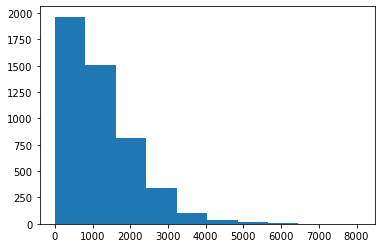

In [ ]:
import matplotlib.pyplot as plt 
plt.hist(likes);

В принципе похожим образом можно скачать что угодно. Обратите внимание, что у вк есть специальный метод [`execute`,](https://vk.com/dev/execute) который иногда помогает ускорить скачку в $25$ раз.

# 4. Selenium

Это инструмент для роботизированного управления браузером. Для его коректной работы нужно скачать драйвер: [для хрома](https://sites.google.com/a/chromium.org/chromedriver/downloads) или [для фаерфокса.](https://github.com/mozilla/geckodriver/releases) 

In [ ]:
from selenium import webdriver

driver = webdriver.Firefox()

После выполнения верхнего блока у вас откроется ещё один браузер. Можно пойти в нём на стартовую гугла. 

In [ ]:
ref = 'http://google.com'
driver.get(ref)

Найти по html-коду строку для ввода запроса, кликнуть на неё. 

In [ ]:
stroka = driver.find_element_by_name("q")
stroka.click()

<ipython-input-64-3d9bf865e72d>:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  stroka = driver.find_element_by_name("q")


Написать в неё что-нибудь. 

In [ ]:
stroka.send_keys('Вконтакте')

Найти кнопку для гугления и нажать её. 

In [ ]:
# находим кнопку для гугления и жмём её
button = driver.find_element_by_name('btnK')
button.click()

<ipython-input-66-83f31cfc20f4>:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  button = driver.find_element_by_name('btnK')


У нас на стринчке есть поисковая выдача. Заберём её в bs4 и найдём все сайты. 

In [ ]:
bs = BeautifulSoup(driver.page_source)

# "грязные" данные
dirty_hrefs = bs.find_all('a', attrs={'class':'l'})
dirty_hrefs

[<a class="l" data-jsarwt="1" data-usg="AOvVaw18t7pi476Ol0YfG2fgGDYR" data-ved="2ahUKEwjU6b-24tP2AhV9AxAIHWs3AKsQjBB6BAgEEAE" href="https://vk.com/login">Вход</a>,
 <a class="l" data-jsarwt="1" data-usg="AOvVaw2Sy7uwzJR8ejX6X426RtP3" data-ved="2ahUKEwjU6b-24tP2AhV9AxAIHWs3AKsQjBB6BAgLEAE" href="https://vk.com/vk">Вк</a>,
 <a class="l" data-jsarwt="1" data-usg="AOvVaw3OosKDDIrDqVVYPU2is0H8" data-ved="2ahUKEwjU6b-24tP2AhV9AxAIHWs3AKsQjBB6BAgKEAE" href="https://vk.com/page-777107_28406709">Моя Страница</a>,
 <a class="l" data-jsarwt="1" data-usg="AOvVaw2H7FfblOOf5fNCrBOFmWob" data-ved="2ahUKEwjU6b-24tP2AhV9AxAIHWs3AKsQjBB6BAgFEAE" href="https://vk.com/blog">Блог</a>,
 <a class="l" data-jsarwt="1" data-usg="AOvVaw3wA_oWh7FV1nvopZtOZoXJ" data-ved="2ahUKEwjU6b-24tP2AhV9AxAIHWs3AKsQjBB6BAgJEAE" href="https://vk.com/about">Социальная сеть</a>,
 <a class="l" data-jsarwt="1" data-usg="AOvVaw2jeY8t5XZm4vfYEIjiXtQm" data-ved="2ahUKEwjU6b-24tP2AhV9AxAIHWs3AKsQjBB6BAgGEAE" href="https://vk.com/biz">

In [ ]:
# очистим данные от ненужной информации
clean_hrefs = [href.get('href') for href in dirty_hrefs]
clean_hrefs

['https://vk.com/login',
 'https://vk.com/vk',
 'https://vk.com/page-777107_28406709',
 'https://vk.com/blog',
 'https://vk.com/about',
 'https://vk.com/biz']

Закроем браузер. 

In [ ]:
driver.close()

Вообще selenium придумывали для тестировщиков, а не для парсинга. Для парсеров имеет смысл использовать только в крайнем случае. Он очень медленный. Если у вас очень-очень-очень-очень не получается обмануть сервер через requests или вы сталкиваетесь с какой-то специфической защитой от ботов, seleium может помочь. Ещё для selenium __важно__ не забывать ставить временные задержки, чтобы страница успевала прогрузиться. Либо можно дописывать полноценные код, который будет ждать прогрузки и только тогда тыкать на кнопки и тп. 


# 5. Хитрости



### Хитрость 1:  не стесняйтесь пользоваться `try-except`

Эта конструкция позволяет питону в случае ошибки сделать что-нибудь другое либо проигнорировать её. Например, мы хотим найти логарифм от всех чисел из списка: 

In [ ]:
from math import log 

a = [1,2,3,-1,-5,10,3]

for item in a:
    print(log(item))

0.0
0.6931471805599453
1.0986122886681098


ValueError: math domain error

У нас не выходит, так как логарифм от отрицательных чисел не берётся. Чтобы код не падал при возникновении ошибки, мы можем его немного изменить: 

In [ ]:
from math import log 

a = [1,2,3,-1,-5,10,3]

for item in a:
    try:
        print(log(item))  # попробуй взять логарифм
    except:
        print('я не смог') # если не вышло, сознайся и работай дальше

0.0
0.6931471805599453
1.0986122886681098
я не смог
я не смог
2.302585092994046
1.0986122886681098


__Как это использовать при парсинге?__  Интернет создаёт человек. У многих людей руки очень кривые. Предположим, что мы на ночь поставили парсер скачивать цены, он отработал час и упал из-за того, что на како-нибудь одной странице были криво проставлены теги, либо вылезло какое-то редкое поле, либо вылезли какие-то артефакты от старой версии сайта, которые не были учтены в нашем парсере. Гораздо лучше, чтобы код проигнорировал эту ошибку и продолжил работать дальше. 

### Хитрость 2:  pd.read_html

Если на странице, которую вы спарсили, среди тэгов `<tr>` и `<td>` прячется таблица, чаще всего можно забрать её себе без написания цикла, который будет перебирать все стобцы и строки. Поможет в этом `pd.read_html`. Например, вот так можно забрать себе [табличку с сайта ЦБ](https://cbr.ru/currency_base/daily/) 

In [ ]:
import pandas as pd

df = pd.read_html('https://cbr.ru/currency_base/daily/', header=None)[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,766025
1,944,AZN,1,Азербайджанский манат,613071
2,51,AMD,100,Армянских драмов,212771
3,933,BYN,1,Белорусский рубль,315237
4,975,BGN,1,Болгарский лев,585252


Команда пытается собрать в массив все таблички c веб-страницы. Если хочется, можно сначала через bs4 найти нужную таблицу, а потом уже распарсить её: 

In [ ]:
resp = requests.get('https://cbr.ru/currency_base/daily/')
tree = BeautifulSoup(resp.content, 'html.parser')

# нашли табличку
table = tree.find_all('table', {'class' : 'data'})[0]

# распарсили её
df = pd.read_html(str(table), header=None)[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,766025
1,944,AZN,1,Азербайджанский манат,613071
2,51,AMD,100,Армянских драмов,212771
3,933,BYN,1,Белорусский рубль,315237
4,975,BGN,1,Болгарский лев,585252


### Хитрость 3:  используйте пакет tqdm

> Код уже работает час. Я вообще без понятия когда он закончит работу. Было бы круто узнать, сколько ещё ждать... 

Если в вашей голове возникла такая мысль, пакет `tqdm` ваш лучший друг. Установите его: ```pip install tqdm```

In [ ]:
from tqdm import tqdm_notebook

a = list(range(30))

# 30 раз будем спать по секунде
for i in tqdm_notebook(a):
    time.sleep(1)

<ipython-input-136-b83b2df6bc34>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(a):


  0%|          | 0/30 [00:00<?, ?it/s]

Мы обмотали тот вектор, по которому идёт цикл в `tqdm_notebook`. Это даёт нам красивую зелёную строку, которая показывает насколько сильно мы продвинулись по коду. Обматывайте свои самые большие и долгие циклы в `tqdm_notebook` и всегда понимайте сколько осталось до конца. 

### Хитрость 4:  распаралеливание

Если сервер не очень настроен вас банить, можно распаралелить свои запросы к нему. Самый простой способ сделать это — библиотека `joblib`. 

In [ ]:
from joblib import Parallel, delayed
from tqdm import tqdm_notebook

def simple_function(x):
    return x**2


nj = -1 # паралель на все ядра 
result = Parallel(n_jobs=nj)(
                delayed(simple_function)(item)          # какую функцию применяем 
                for item in tqdm_notebook(range(10)))   # к каким объектам применям

# tqdm_notebook в последней строчке будет создавать зелёный бегунок с прогрессом

<ipython-input-137-fd2fcb2aa7b1>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for item in tqdm_notebook(range(10)))   # к каким объектам применям


  0%|          | 0/10 [00:00<?, ?it/s]

На самом деле это не самый эффективный способ паралелить в python. Он жрёт много памяти и работает медленнее, чем [стандартный multiprocessing.](https://docs.python.org/3/library/multiprocessing.html) Но зато две строчки, КАРЛ! Две строчки! 

### Хитрость 5:  selenium без браузера

Селениум можно настроить так, чтобы физически браузер не открывался.

In [ ]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

options = Options()
options.headless = True 
driver = webdriver.Firefox(options=options)

ref = 'http://google.com'
driver.get(ref)

driver.close()

### Ещё хитрости: 

* __Сохраняйте то, что парсите по мере скачки!__ Прямо внутрь цикла запихните код, который сохраняет файл! 
* Когда код упал в середине списка для скачки, не обязательно запускать его с самого начала. Просто сохраните тот кусок, который уже скачался и дозапустите код с места падения.
* Засовывать цикл для обхода ссылок внутрь функции - не самая хорошая идея. Предположим, что надо обойти $100$ ссылок. Функция должна вернуть на выход объекты, которые скачались по всему этому добру. Она берёт и падает на $50$ объекте. Конечно же то, что уже было скачано, функция не возвращает. Всё, что вы накачали - вы теряете. Надо запускать заново. Почему? Потому что внутри функции своё пространство имён. Если бы вы делали это циклом влоб, то можно было бы сохранить первые $50$ объектов, которые уже лежат внутри листа, а потом продолжить скачку. 
* Можно ориентироваться на html-страничке с помощью `xpath`. Он предназначен для того, чтобы внутри html-странички можно было быстро находить какие-то элементы. [Подробнее можно почитать тут.](https://devhints.io/xpath)
* Не ленитесь листать документацию. Из неё можно узнать много полезных штук. 

# 6. Парсинг новостей с сайта Вышки


Мы поработаем со страницей новостей Международного сетевого анализа Вышки. Посмотреть [эту страницу](https://anr.hse.ru/).

In [ ]:
import requests

response = requests.get("https://anr.hse.ru/")

#with open("hse.html", "w") as fp:
#   fp.write(response.text)

print(response.text)

<!DOCTYPE html>
<!-- (c) Art. Lebedev Studio | http://www.artlebedev.com/ -->
<html xmlns:perl="urn:perl" lang="ru"><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="theme-color" content="#1658DA"><meta name="viewport" content="width=device-width"><link rel="apple-touch-icon" sizes="180x180" href="/f/src/global/i/favicon/favicon_ios_180x180.png"><link rel="icon" type="image/png" sizes="32x32" href="/f/src/global/i/favicon/favicon_32x32.png"><link rel="icon" type="image/png" sizes="16x16" href="/f/src/global/i/favicon/favicon_16x16.png"><link rel="mask-icon" href="/f/src/global/i/favicon/favicon.svg" color="#242f63"><link rel="manifest" href="/f/src/manifest/manifest_ru.json"><meta name="msapplication-config" content="/f/src/global/i/favicon/browserconfig.xml"><link rel="shortcut icon" type="image/x-icon" href="/favicon.ico"><!--[if lt IE 10]><script src="/f/src/global/bower_components/es5-shim/es5-s

In [ ]:
if response.status_code == 200:
  print("ok")

ok


In [ ]:
from google.colab import files
files.download('hse.html') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import re

res = re.findall(r"<title>(.+?)</title>", response.text)
print("\nPage title is: ", res[0])


Page title is:  Международная лаборатория прикладного сетевого анализа — Национальный исследовательский университет «Высшая школа экономики»


In [ ]:
res = re.findall(r"(?<=class=\"link link_dark2 no-visited\">)(.*?)(?=</a>)", response.text)
for hr in res:
    print(f"### {hr}")

### Арюна Ким зачислена в академический кадровый резерв
### Сотрудница ANR-Lab Марья Воробьева проведет семестр по обмену в Бельгии
### Сотрудники ANR-Lab получили благодарности от руководства университета
### Сотрудница ANR-Lab и студентка MASNA Алина Арсланова стала лауреатом конкурса НИРС 2021
### Научные руководители ANR-Lab удостоены почетных наград Словении
### Стажер-исследователь ANR-Lab Марья Воробьева опубликовала статью в журнале первого квартиля
### Сотрудники лаборатории приняли участие в 5-й Европейской конференции по социальным сетям EUSN 2021
### Станислав Моисеев принял участие в 15-й конференции, организованной Европейской социологической ассоциацией ESA 2021
### Сотрудники ANR-Lab приняли участие в Санкт-Петербургской летней школе по сетевому анализу
### Сотрудники лаборатории приняли участие в 26-м Всемирном конгрессе политических наук


Затем мы выделяем некоторый текст в соответствии с тегом вокруг текста, используя регулярное выражение.


In [ ]:
res[-10:]

['Арюна Ким зачислена в академический кадровый резерв',
 'Сотрудница ANR-Lab Марья Воробьева проведет семестр по обмену в Бельгии',
 'Сотрудники ANR-Lab получили благодарности от руководства университета',
 'Сотрудница ANR-Lab и студентка MASNA Алина Арсланова стала лауреатом конкурса НИРС 2021',
 'Научные руководители ANR-Lab удостоены почетных наград Словении',
 'Стажер-исследователь ANR-Lab Марья Воробьева опубликовала статью в журнале первого квартиля',
 'Сотрудники лаборатории приняли участие в 5-й Европейской конференции по социальным сетям EUSN 2021',
 'Станислав Моисеев принял участие в 15-й конференции, организованной Европейской социологической ассоциацией ESA 2021',
 'Сотрудники ANR-Lab приняли участие в Санкт-Петербургской летней школе по сетевому анализу',
 'Сотрудники лаборатории приняли участие в 26-м Всемирном конгрессе политических наук']

Далее получим ссылки с помощью регулярных выражений.

Почитать о регулярных выражениях и потестить их работу [тут](https://regexone.com/).

In [ ]:
res = re.findall(r'href="(.*?\.)', response.text)
for hr in res:
    print(f"### {hr}")

### /f/src/global/i/favicon/favicon_ios_180x180.
### /f/src/global/i/favicon/favicon_32x32.
### /f/src/global/i/favicon/favicon_16x16.
### /f/src/global/i/favicon/favicon.
### /f/src/manifest/manifest_ru.
### /favicon.
### /f/src/global/css/main.
### /f/src/global/css/vision.
### /f/src/global/css/sitemap.
### /f/src/global/css/fotorama.
### /f/src/home/owl.
### /f/src/science/science.
### /f/src/dop_card/dop_card.
### /f/src/science_dep_card/science_dep_card.
### /f/src/projects/science_dep/mobile.
### /f/src/global/bower_components/jqcloud2/dist/jqcloud.
### https://anr.
### https://anr.
### https://anr.
### https://anr.
### /f/src/projects/science_dep/mobile.
### https://www.
### https://www.
### https://anr.
### //www.
### //www.
### https://anr.
### https://anr.
### https://anr.
### https://anr.
### https://anr.
### https://anr.
### https://anr.
### https://anr.
### https://anr.
### https://anr.
### https://anr.
### https://www.
### https://www.
### https://anr.
### https://www.
#

Далее подключим для работы **BeautifulSoup**.

In [ ]:
from bs4 import BeautifulSoup
import requests

resp = requests.get("https://anr.hse.ru/")
html = resp.text
#print(html)

Анализируя этот html с помощью метода html.parser, создим объект супа. И возьмем просто «h1» или «p», чтобы вызвать заголовок 1 и тег абзаца из супа.


In [ ]:
soup = BeautifulSoup(html, "html.parser")
print(soup.a)
#print('\n', soup.p)

<a class="link" href="https://www.hse.ru/cookie.html" target="_blank" title="Пройти по ссылке">здесь</a>


Вы всегда можете использовать некоторые полезные функции для поиска тегов и получить доступ к атрибуту найденных тегов с помощью ключа точно так же, как это в словаре Python.


In [ ]:
all_href = soup.find_all('a')
all_href = [l['href'] for l in all_href]
for hr in all_href:
    print(f"### https://www.hse.ru{hr}")

### https://www.hse.ruhttps://www.hse.ru/cookie.html
### https://www.hse.ruhttps://www.hse.ru/data_protection_regulation
### https://www.hse.ruhttps://anr.hse.ru/en/
### https://www.hse.ru//www.hse.ru/user/
### https://www.hse.ru//www.hse.ru/search/search.html?simple=0
### https://www.hse.ruhttps://anr.hse.ru
### https://www.hse.ruhttps://anr.hse.ru/about
### https://www.hse.ruhttps://anr.hse.ru/persons
### https://www.hse.ruhttps://anr.hse.ru/job
### https://www.hse.ruhttps://anr.hse.ru/directions
### https://www.hse.ruhttps://anr.hse.ru/projects
### https://www.hse.ruhttps://anr.hse.ru/news/announcements/
### https://www.hse.ruhttps://anr.hse.ru/seminars
### https://www.hse.ruhttps://anr.hse.ru/news/ourconferences/
### https://www.hse.ruhttps://anr.hse.ru/news/ourschools/
### https://www.hse.ruhttps://anr.hse.ru/resources
### https://www.hse.ruhttps://www.hse.ru/ma/sna
### https://www.hse.ruhttps://www.hse.ru/ma/dataanalytics/
### https://www.hse.ruhttps://anr.hse.ru/consult
### http

Далее проанализируем этот html с помощью метода lxml и создадим объект супа: найдем все теги "li", которые имеют class=month.


In [ ]:
soup = BeautifulSoup(html, 'lxml')

# use class to narrow search
posts = soup.find_all('div', {"class": "post"})
for post in posts:
    print("####\n" + post.get_text())

####
function setSliderTopProp() { $('.js-splash-slider--top').triggerHandler('configuration').auto.timeoutDuration = 10000;;$(window).trigger('resize');}
####
2фев2022Арюна Ким зачислена в академический кадровый резервПоздравляем стажера-исследователя ANR-Lab Арюну Ким с зачислением в академический кадровый резерв в категорию “Новые исследователи”.Наукадостиженияконструктор успехаофициально2 февраля
####
25янв2022Сотрудница ANR-Lab Марья Воробьева проведет семестр по обмену в БельгииСтудентка MASNA и стажер-исследователь ANR-Lab Марья Воробьева отправилась в Левенский католический университет (KU Leuven) по программе студенческого обмена на весенний семестр (с января по июль).Образованиедостиженияконструктор успехастудентымагистратура25 января
####
16янв2022Сотрудники ANR-Lab получили благодарности от руководства университета24 декабря состоялось торжественное мероприятие в связи с 10-летним юбилеем проекта “Международные лаборатории”, где сотрудники ANR-Lab Дарья Мальцева, Дмитрий За

Пусть мы хотим загрузить все картинки из новостной ленты страницы Вышки, т.е. [отсюда](https://www.hse.ru/news/).

In [ ]:
images = soup.find_all('div', {"class": "picture first_child"})

In [ ]:
images

[<div class="picture first_child"><img alt="Иллюстрация к новости: Арюна Ким зачислена в академический кадровый резерв" src="/data/2022/02/02/1758168211/1%D0%B3%D0%BE%D1%80%D0%B8%D0%B7%D0%BE%D0%BD%D1%82%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D0%BD%D0%BE%20%D0%BD%D0%B5%20%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE.png" title="Арюна Ким зачислена в академический кадровый резерв" width="100%"/></div>,
 <div class="picture first_child"><img alt="Иллюстрация к новости: Сотрудница ANR-Lab Марья Воробьева проведет семестр по обмену в Бельгии" src="/data/2022/01/25/1755658487/6_%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%82%20%D1%81%D0%B0%D0%B9%D1%82%D0%B0%20%D1%81%20%D0%B0%D0%BD%D1%80.png" title="Сотрудница ANR-Lab Марья Воробьева проведет семестр по обмену в Бельгии" width="100%"/></div>,
 <div class="picture first_child"><img alt="Иллюстрация к новости: Сотрудники ANR-Lab получили благодарности от руководства университета" src="/data/2022/01/16/1768269247/3%D0%B2%D0%BE%D1%82%20%D1%8D%D1%82%D0%BE%20%D0%BD%D0

Создадим folder для картинок.

In [ ]:
import os

os.makedirs('./img/', exist_ok=True)

Наконец загрузим картинки.

In [ ]:
url ='https://anr.hse.ru'+url
url

'https://anr.hse.ru//data/2021/08/20/1412528871/3%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202021-08-20%20%D0%B2%2016.54.09.png'

In [ ]:
for div in images:
    imgs = div.find_all('img')
    for img in imgs:
        url = img['src']
        url ='https://anr.hse.ru'+url
        r = requests.get(url, stream=True)
        image_name = url.split('/')[-1]
        with open('./img/%s' % image_name, 'wb') as f:
            for chunk in r.iter_content(chunk_size=128):
                f.write(chunk)
        print('Saved %s' % image_name)

Saved 1%D0%B3%D0%BE%D1%80%D0%B8%D0%B7%D0%BE%D0%BD%D1%82%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D0%BD%D0%BE%20%D0%BD%D0%B5%20%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE.png
Saved 6_%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%82%20%D1%81%D0%B0%D0%B9%D1%82%D0%B0%20%D1%81%20%D0%B0%D0%BD%D1%80.png
Saved 3%D0%B2%D0%BE%D1%82%20%D1%8D%D1%82%D0%BE%20%D0%BD%D0%B0%20%D1%81%D0%B0%D0%B9%D1%82_%D0%BB%D0%B0%D0%B1.png
Saved 3%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%82%20%D0%B4%D1%80%D1%83%D0%B3%D0%BE%D0%B9.png
Saved 1photo_2021-12-13_20-48-53.jpg
Saved 3photo_2021-11-30_17-25-09.jpg
Saved 3EUSN.png
Saved 5ESA.png
Saved 218922948_4223804581019838_2790971888850970307_n-2.jpg
Saved 3%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202021-08-20%20%D0%B2%2016.54.09.png


# 7. Почиташки

* [Парсим мемы в python](https://habr.com/ru/company/ods/blog/346632/) - подробная статья на Хабре, по которой можно научиться ... парсить (ВНЕЗАПНО).
* [Книга про парсинг](https://github.com/FUlyankin/Parsers/blob/master/Ryan_Mitchell_Web_Scraping_with_Python-_Collecting_Data_from_the_Modern_Web_2015.pdf) на случай если вам совсем скучно и хочется почитать что-то длинное и на английском
* [Продвинутое использование requests](https://2.python-requests.org/en/master/user/advanced/)
* [Перевод документации по selenium на русский на хабре](https://habr.com/ru/post/248559/)
